approx is [[[1509  781]]

 [[1245  849]]

 [[1044 1001]]

 [[ 914 1219]]

 [[ 877 1490]]

 [[ 936 1734]]

 [[1095 1948]]

 [[1323 2082]]

 [[1581 2117]]

 [[1838 2049]]

 [[2039 1897]]

 [[2168 1684]]

 [[2210 1422]]

 [[2143 1155]]

 [[1989  951]]

 [[1772  821]]]
shape is circ


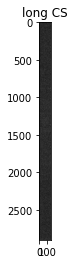

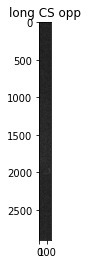

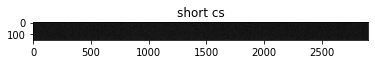

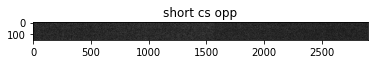

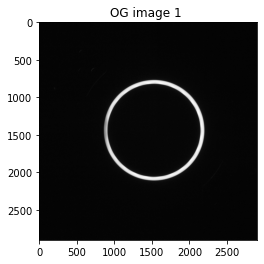

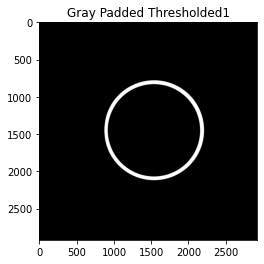

------------------------------------------
approx is [[[ 10  10]]

 [[ 10 975]]

 [[729 975]]

 [[729  10]]]
shape is rectangle


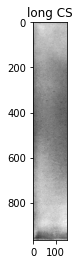

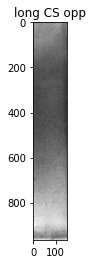

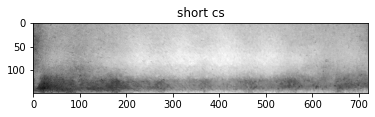

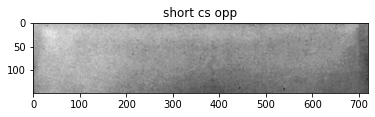

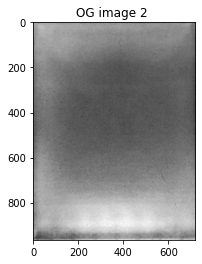

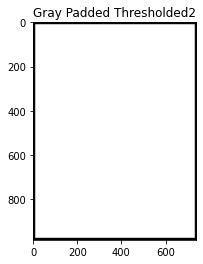

------------------------------------------
approx is [[[  10   10]]

 [[  10 1019]]

 [[ 767 1019]]

 [[ 767   10]]]
shape is rectangle


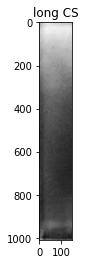

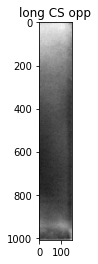

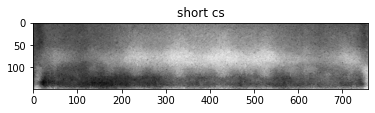

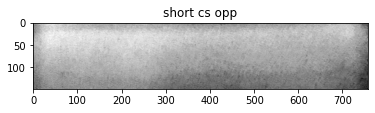

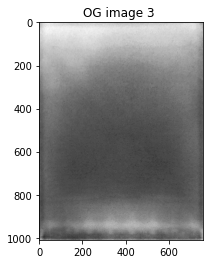

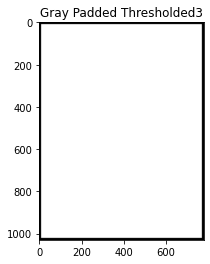

------------------------------------------
approx is [[[ 10  10]]

 [[ 10 655]]

 [[490 655]]

 [[490  10]]]
shape is rectangle


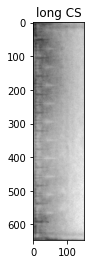

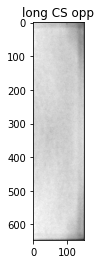

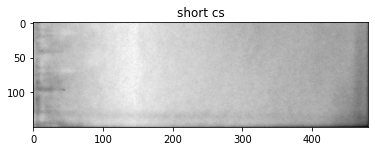

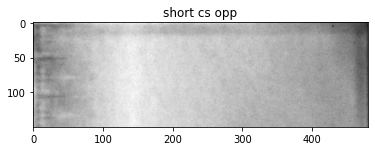

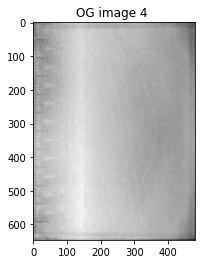

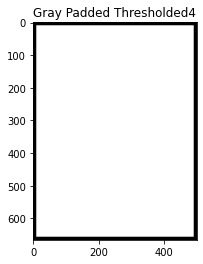

------------------------------------------
approx is [[[ 10  10]]

 [[ 10 654]]

 [[489 654]]

 [[489  10]]]
shape is rectangle


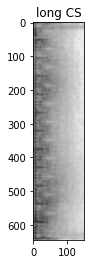

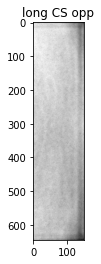

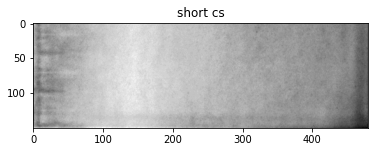

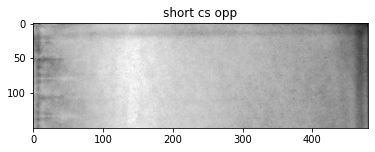

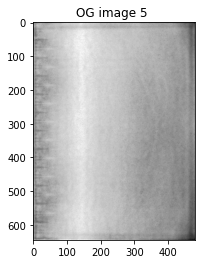

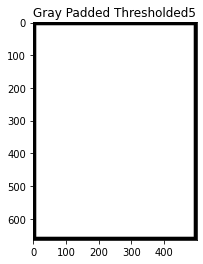

------------------------------------------
approx is [[[1507  770]]

 [[1257  830]]

 [[1041  988]]

 [[ 905 1218]]

 [[ 871 1463]]

 [[ 926 1712]]

 [[1082 1930]]

 [[1310 2068]]

 [[1567 2106]]

 [[1816 2045]]

 [[2031 1888]]

 [[2162 1673]]

 [[2204 1404]]

 [[2138 1147]]

 [[1990  947]]

 [[1768  811]]]
shape is circ


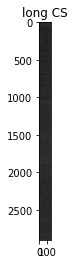

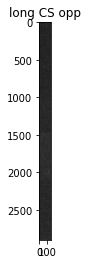

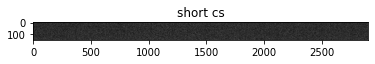

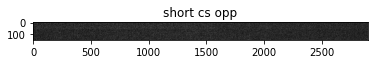

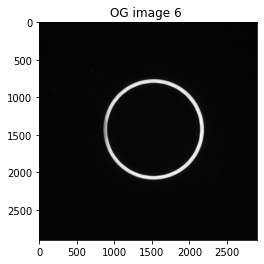

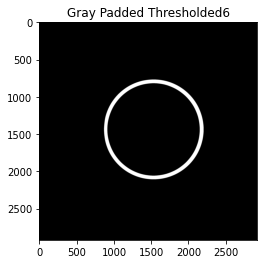

------------------------------------------
approx is [[[ 10  10]]

 [[ 10 655]]

 [[490 655]]

 [[490  10]]]
shape is rectangle


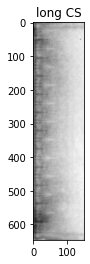

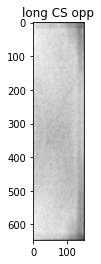

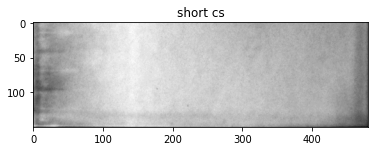

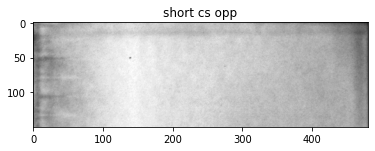

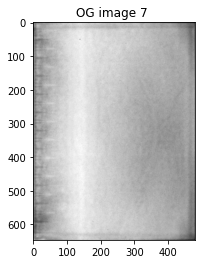

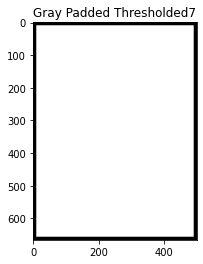

------------------------------------------


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import glob, os
from PIL import Image

#pathTest = '/Users/estepark/Documents/week1_thurs/GRR_Sample/Vermouth_EVT/20181126/Images/Reg/White'
pathTest = '/Users/estepark/Documents/week6_mon/Images/'
isdir = os.path.isdir(pathTest) 
count = 1
for fname in glob.glob(pathTest+'/*.png'):
    img = cv.imread(fname)  # read image
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    widthP = 10
    img8b = np.array(imgray,dtype='uint8')
    imgpad = np.pad( img8b , pad_width = widthP, mode='constant' )

    imgFilt = cv.bilateralFilter(imgpad, 15, 75, 75)
    ret, thresh = cv.threshold( imgFilt , 100, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    im_with_contours = cv.drawContours(img.copy(), contours, -1, (0,255,0), 6)
    
    cnt = []
    for c in contours:
        if len(c) > len(cnt):
            cnt = c
    cont = np.array(contours,dtype = "float")
    
    peri = cv.arcLength( cnt  , True)
    approx = cv.approxPolyDP(cnt, 0.01*peri, True)
#     im_with_poly = cv.drawContours(img, approx, -1, (0,255,255), 10)
#     plt.figure()
#     plt.imshow(im_with_poly)
#     plt.show()
    
    if len(approx) == 3:
        shape = "triangle"
        
    elif len(approx) == 4:
        (x, y, w, h) = cv.boundingRect(approx)
        ar = w/float(h)
        shape = "rectangle"
        if (ar >=0.95 and ar <=1.05): 
            shape = "square"
    elif len(approx) == 5:
        shape = "pentagon"
        
    else:
        shape="circ"
    
    print("approx is {}".format(approx))
    print("shape is {}".format(shape))
    
    crop = []
    # setting the cropping for a long crosshatch 
    y0 = 0 # number of rows
    x0 = 0 # number of cols
    h = img8b.shape[0]  # number of rows
    w = 150  # number of cols
    imgCropL= img8b[y0 : y0+h , x0 : x0+w]
    crop.append(img8b[y0 : y0+h , x0 : x0+w])
    
    # setting the cropping for opposite side of a long crosshatch 
    y0 = 0
    x0 = img8b.shape[1]  # number of rows
    h = img8b.shape[0]  # number of cols
    w = 150  # number of cols
    imgCropL_opp = img8b[y0 : y0+h , x0-w : x0]    
    crop.append(img8b[y0 : y0+h , x0-w : x0]    )
    
    # setting the cropping for a short crosshatch 
    y1 = img8b.shape[0]  # number of rows
    x1 = img8b.shape[1]  # number of cols
    h = 150
    w = img8b.shape[0]
    imgCropS = img8b[y1-h : y1 , 0 : x1]    
    crop.append(imgCropS)

    # setting the cropping for opposite side of a short crosshatch 
    y1 = 0  # number of rows
    x1 = 0  # number of cols
    h = 150
    w = img8b.shape[1]
    imgCropS_opp = img8b[y1 : y1+h , x1 : x1+w]      
    crop.append(imgCropS_opp)
    
    # there's 4 sets of crop? so to speak
    # LETS FINISH THIS TONIGHT OK?! WHOOOOOOOO 
    
    
    plt.figure()
    plt.title('long CS')
    plt.imshow(imgCropL, cmap = "gray")
    plt.show()
    
    plt.figure()
    plt.title('long CS opp')
    plt.imshow(imgCropL_opp, cmap = "gray")
    plt.show()
    
    plt.figure()
    plt.title("short cs")
    plt.imshow(imgCropS, cmap = "gray")
    plt.show()
    
    plt.figure()
    plt.title("short cs opp")
    plt.imshow(imgCropS_opp, cmap = "gray")
    plt.show()
    
    plt.figure()
    plt.title("OG image" + " {} ".format(count)) 
    plt.imshow(imgray , cmap = "gray")
    plt.show()
    
    plt.figure()
    plt.title("Gray Padded Thresholded" + str(count))
    plt.imshow(thresh , cmap="gray")
    plt.show()

    for i in crop:
        # say you feed in a short crsshatch in the for loop
        # add the score of the crosshatch here
        self.ishort(imgCropS_opp) # will give lo score
        self.ishort(imgCropS) # will give hi score
        self.ishort(imgCropL) # will give lo score
        self.ishort(imgCropL_opp) # will give low score
    
    count+=1
    print("------------------------------------------")

In [30]:
x = np.arange(2,14).reshape(3,4)
#b = np.pad(x,[ (2,), (2, )] , mode='constant' )
print("this is x: \n{}".format(x))
print(" ")
mat = np.ones(x.shape)
#mat[:x.shape[0], x.shape[1]] = x
z= x[0:3, 0:2]
print(z)

this is x: 
[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]
 
[[ 2  3]
 [ 6  7]
 [10 11]]


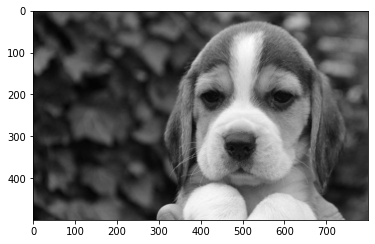

In [28]:
pathTest = '/Users/estepark/Documents/week7_fri/'
isdir = os.path.isdir(pathTest) 
count = 1

def plot(img):
    plt.figure()
    plt.imshow(img, cmap = "gray" )
    return plt.show()
    
for fname in glob.glob(pathTest+'/*.jpg'):
    img = cv.imread(fname)  # read image
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img8b = np.array(imgray,dtype='uint8')
    
    widthP = 100
    imgpad = np.pad( img8b , pad_width = widthP, mode='constant' )
    y = widthP+1
    x = widthP+1
    h = 500
    w = 800
    imgCrop = imgpad[y:y+h , x:x+w]
    plot(imgCrop)
    

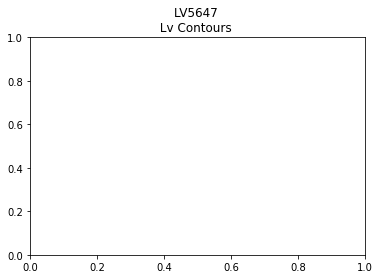

In [11]:
spltName = "LV5647"
title = "Lv Contours "
plt.figure()
plt.title("{} \n {} ".format(spltName, title))
plt.show()

0
1
2
3
